<a href="https://colab.research.google.com/github/sravani223/23CSBTB30/blob/main/_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## implementation of Linear Regression on Housing Dataset

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

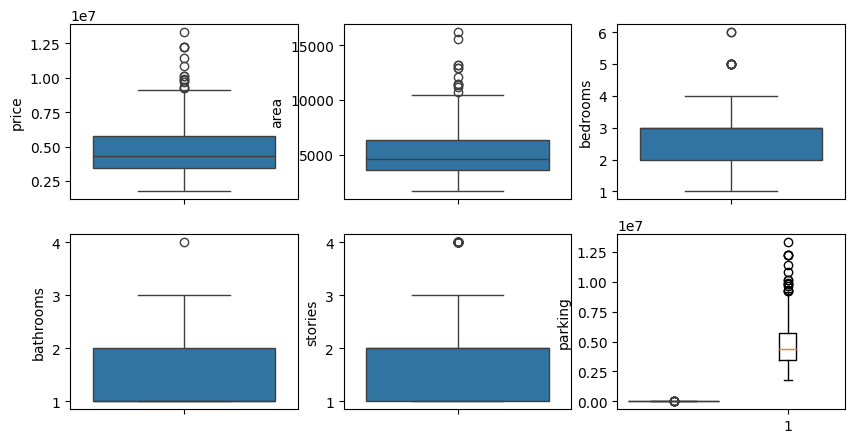

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
housing=pd.read_csv("Housing.csv")
print (housing.head())
housing.shape
housing.info()
housing.describe()
housing.isnull().sum()*100/housing.shape[0]
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])


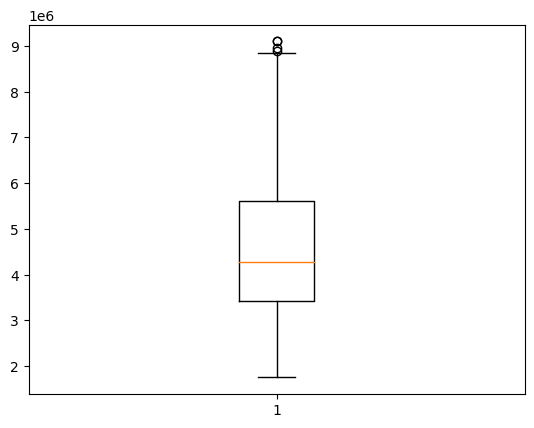

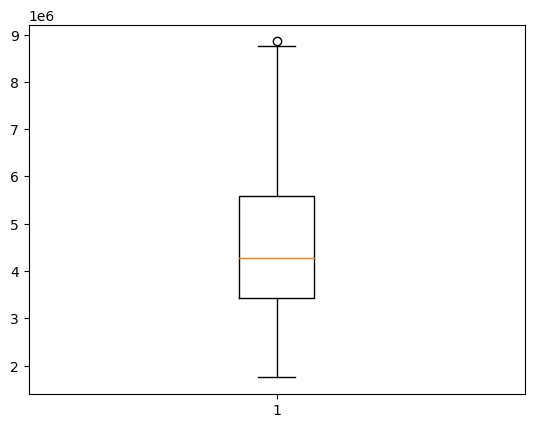

In [11]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]


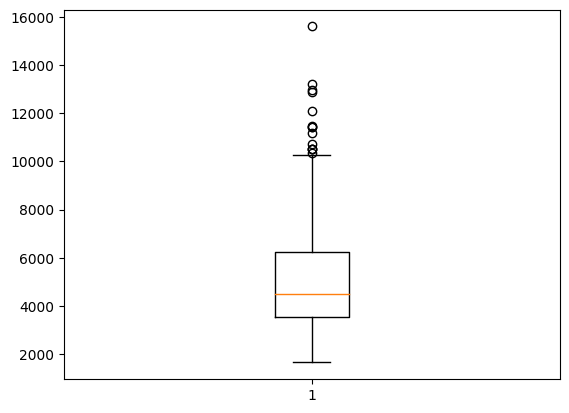

In [12]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]


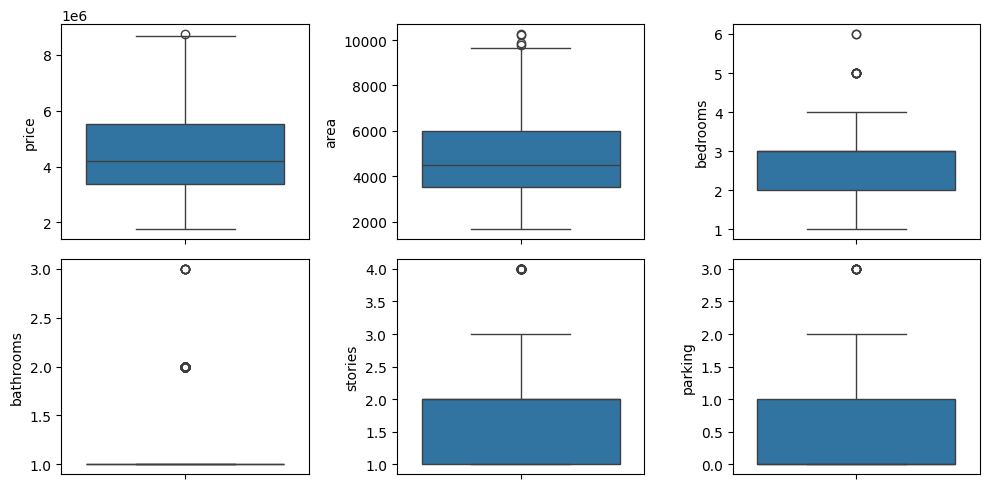

In [13]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()


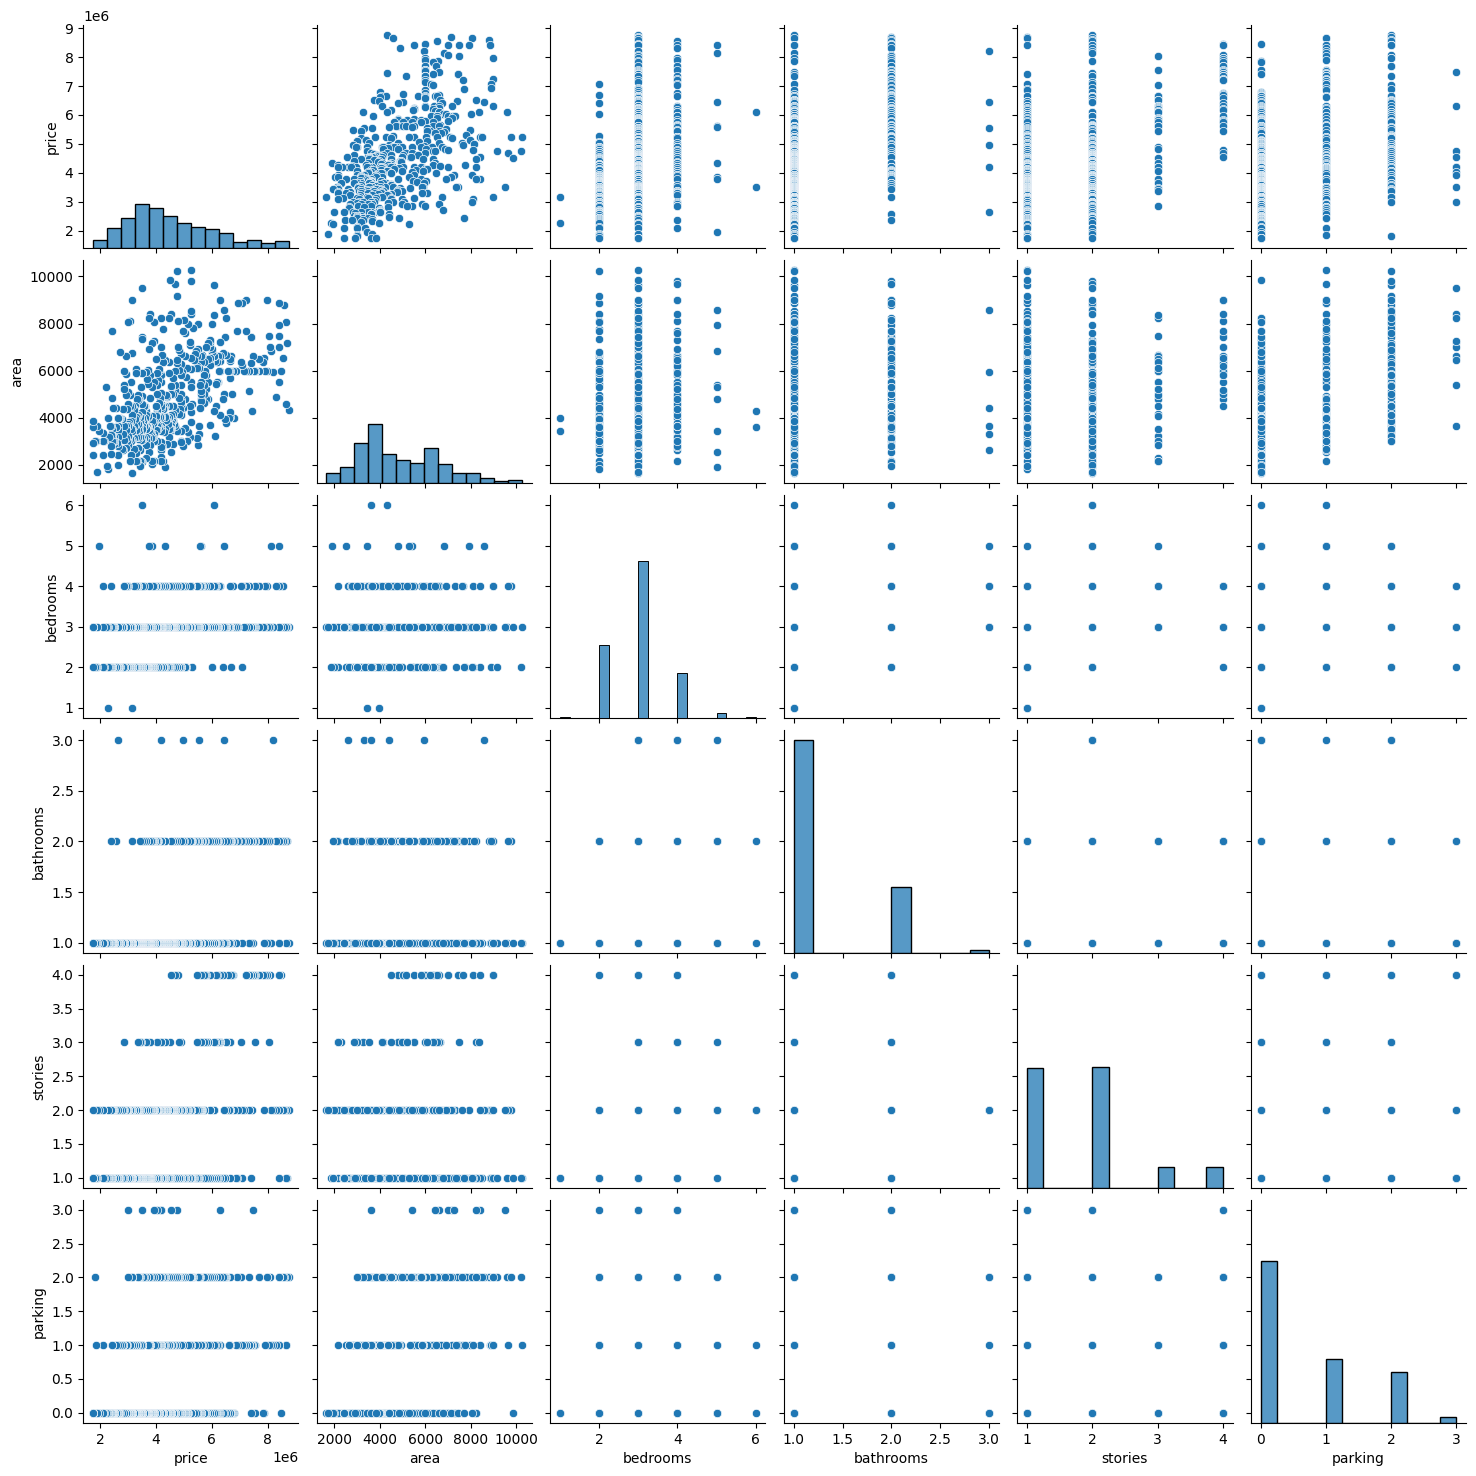

In [14]:
sns.pairplot(housing)
plt.show()


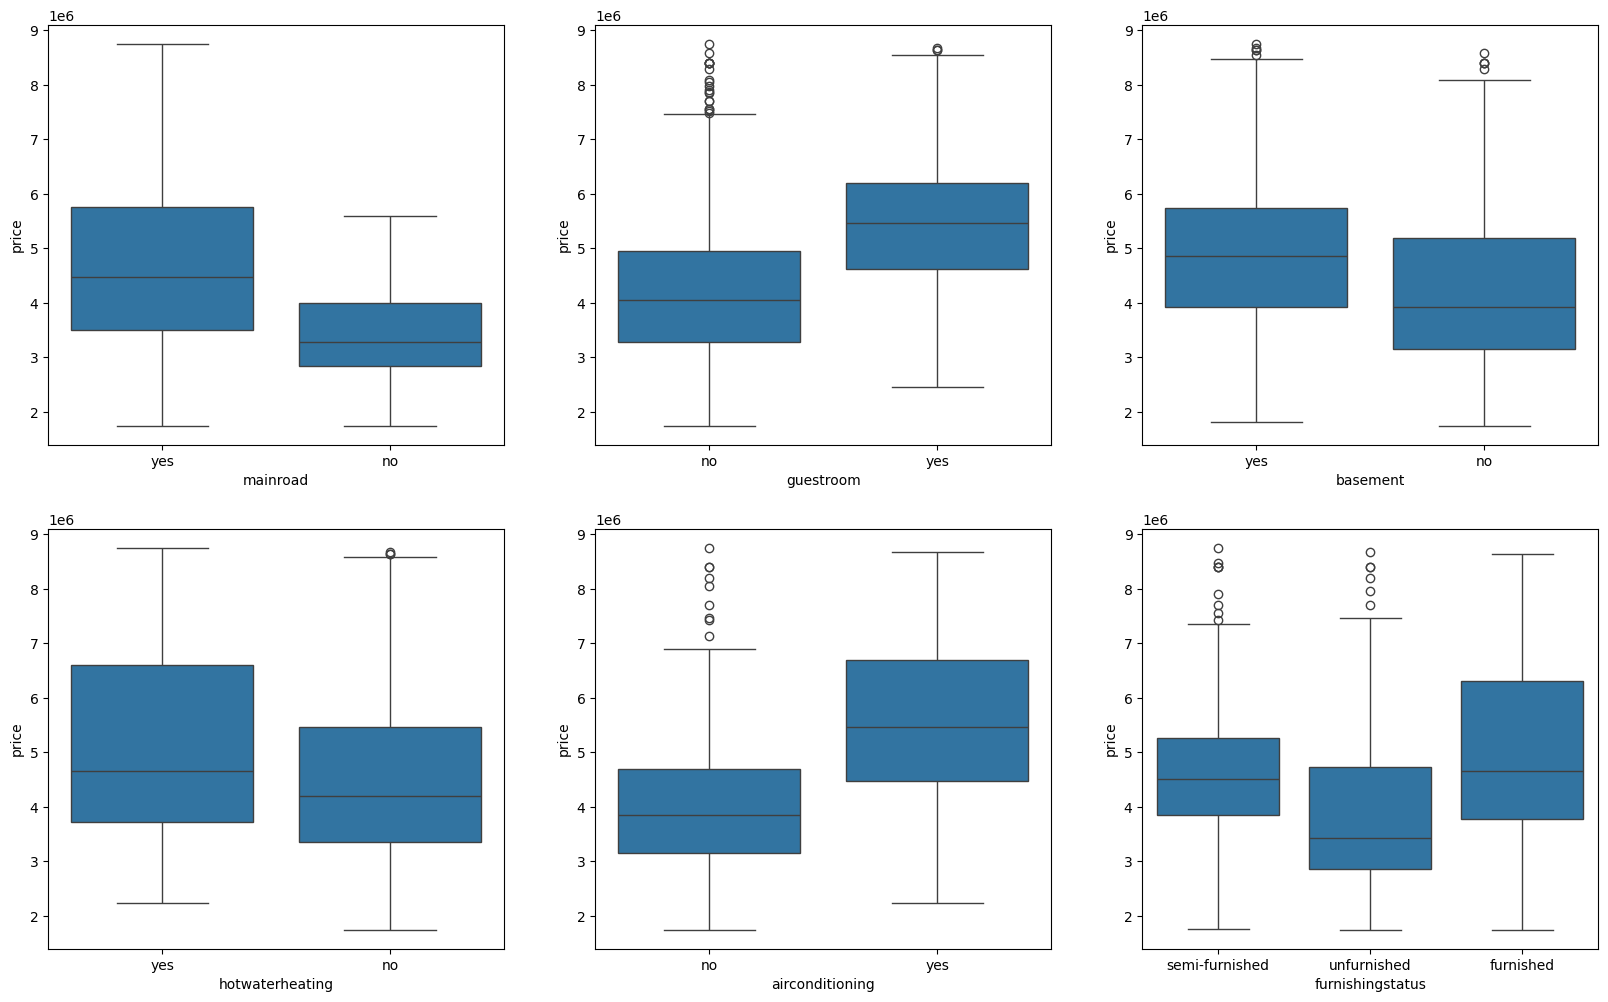

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()


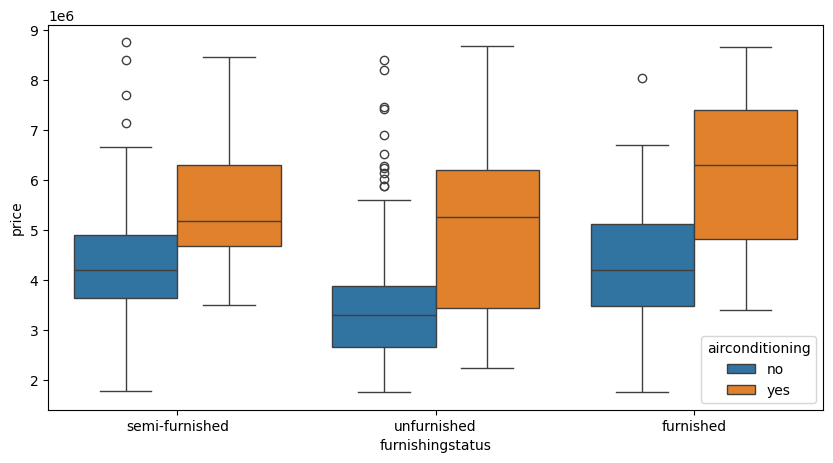

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()


In [18]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)


In [19]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
21,8680000,7155,3,2,1,NaN,NaN,NaN,NaN,NaN,2,NaN,unfurnished
22,8645000,8050,3,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,furnished
23,8645000,4560,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,furnished
24,8575000,8800,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished


In [20]:
status = pd.get_dummies(housing['furnishingstatus'])


In [21]:
status.head()


,furnished,semi-furnished,unfurnished
20,False,True,False
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False


In [22]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [23]:
housing = pd.concat([housing, status], axis = 1)


In [24]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
20,8750000,4320,3,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished,True,False
21,8680000,7155,3,2,1,NaN,NaN,NaN,NaN,NaN,2,NaN,unfurnished,False,True
22,8645000,8050,3,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,furnished,False,False
23,8645000,4560,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,furnished,False,False
24,8575000,8800,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished,False,False


In [25]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)


In [26]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
20,8750000,4320,3,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False
21,8680000,7155,3,2,1,NaN,NaN,NaN,NaN,NaN,2,NaN,False,True
22,8645000,8050,3,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,False,False
23,8645000,4560,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,False,False
24,8575000,8800,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,False,False


In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)


In [28]:
from sklearn.preprocessing import MinMaxScaler


In [29]:
scaler = MinMaxScaler()


In [30]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [31]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
100,0.640,0.576251,0.25,0.5,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False,True
487,0.160,0.436554,0.50,0.0,0.333333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False,True
248,0.399,0.285215,0.00,0.5,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True,False
109,0.620,0.577998,0.50,0.5,0.333333,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,True,False
499,0.130,0.230501,0.25,1.0,0.333333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False,True


In [32]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,357.000000,357.000000,357.000000,357.000000,357.000000,0.0,0.0,0.0,0.0,0.0,357.000000,0.0
mean,0.391666,0.374467,0.238095,0.127451,0.265173,NaN,NaN,NaN,NaN,NaN,0.220355,NaN
std,0.216398,0.200460,0.186533,0.233747,0.287088,NaN,NaN,NaN,NaN,NaN,0.284860,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,0.230000,0.227008,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,0.350000,0.331781,0.250000,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,0.530000,0.506403,0.250000,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


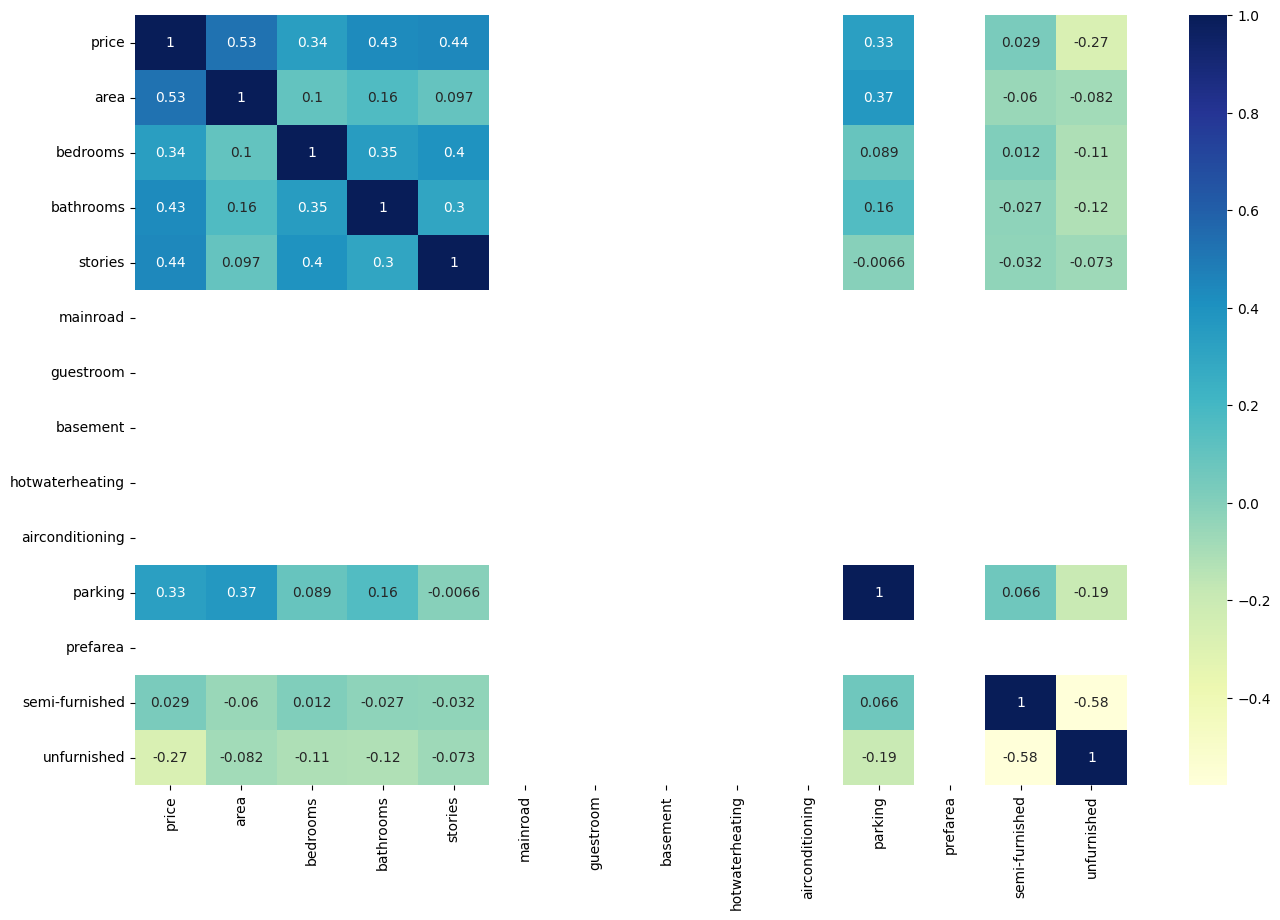

In [33]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [54]:
y_train = df_train.pop
X_train = df_train

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
